In [1]:
#from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline

#mongo db connect library
from pymongo import MongoClient
from random import randint

In [2]:
# database name
db_name= 'test_col1'

# table or collection name
collection_name = 'col1'

#Step 1: Connect to MongoDB - Note: Change connection string as needed
client = MongoClient(port=27017)
db=client[db_name]

In [3]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test_col1')

In [4]:
# convert mongo db json data into pandas dataframe
data= pd.DataFrame(list(db[collection_name].find()))

In [5]:
df = data

In [6]:
#df.info()

In [7]:
df.head()

,_id,Row transaction type,Item code,Prefix,Warehouse code,Warehouse group code,Sales Order Number,Sales Order Line Number,Extraction date,Ordered/requested quantity,...,Free text 1,Free text 2,Free text 3,Free text 4,Free text 5,use for sales value KPI,Demand stream,Direct demand,order date,fil_name
0,5ecbf8080b7cac9fce9ef56d,M,402066352R,RE,27611782,27611782,26386,4,20191001T1905,2,...,S,F,11909425,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
1,5ecbf8080b7cac9fce9ef56e,M,410601073R,RE,27611782,27611782,26386,5,20191001T1905,1,...,S,F,11909425,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
2,5ecbf8080b7cac9fce9ef56f,M,440607091R,RE,27611782,27611782,26386,8,20191001T1905,1,...,S,F,11909425,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
3,5ecbf8080b7cac9fce9ef570,M,152089599R,RE,27611782,27611782,25815,2,20191001T1905,1,...,S,F,11909426,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...
4,5ecbf8080b7cac9fce9ef571,M,110265505R,RE,27611782,27611782,25815,3,20191001T1905,1,...,S,F,11909426,NaN,NaN,NaN,CATEL,NaN,NaN,27611782_TRANSACTIONAL_DEMAND_DELTA_20191001_2...


In [8]:
# delete un-wanted columns in the data
df = df.drop(["_id", "Prefix", "Warehouse group code", "Free text 1","Free text 2","Free text 3","Free text 4","Free text 5","Demand stream","Direct demand", "fil_name","Customer code","Use for service level","Use for classic level","Stock at demand date","use for sales value KPI", "order date"], axis=1)

# Rename multiple columns in one go with a larger dictionary
df.rename(
    columns={
        "Warehouse code":"warehouse_code",
        "Ordered/requested quantity": "order_req_qty",
        "Delivered/supplied quantity": "delivered_resp_qty",
        "Demand Date":"demand_date",
        "Item code":"item_code",
        "Row transaction type":"row_txn_type",
        "Sales Order Number":"sales_order_number",
        "Sales Order Line Number":"sales_order_line_number",
        "Extraction date":"extraction_date",
        "Use for forecasting":"use_for_forecasting"
    },
    inplace=True
)

In [9]:
#df.drop_duplicates();
#df.drop_duplicates(keep=False,inplace=True) 

# using dictionary to convert specific columns 
convert_dict = {'order_req_qty': int, 'delivered_resp_qty':int}  
df = df.astype(convert_dict) 

In [10]:
df.head()

,row_txn_type,item_code,warehouse_code,sales_order_number,sales_order_line_number,extraction_date,order_req_qty,delivered_resp_qty,demand_date,use_for_forecasting
0,M,402066352R,27611782,26386,4,20191001T1905,2,2,20190902,Y
1,M,410601073R,27611782,26386,5,20191001T1905,1,1,20190902,Y
2,M,440607091R,27611782,26386,8,20191001T1905,1,1,20190902,Y
3,M,152089599R,27611782,25815,2,20191001T1905,1,1,20190902,Y
4,M,110265505R,27611782,25815,3,20191001T1905,1,1,20190902,Y


In [11]:
df = df.drop(["warehouse_code","delivered_resp_qty","row_txn_type","sales_order_number","sales_order_line_number","extraction_date","use_for_forecasting"], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483409 entries, 0 to 483408
Data columns (total 3 columns):
item_code        483409 non-null object
order_req_qty    483409 non-null int32
demand_date      483409 non-null object
dtypes: int32(1), object(2)
memory usage: 9.2+ MB


In [13]:
df['demand_date']=pd.to_datetime(df['demand_date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483409 entries, 0 to 483408
Data columns (total 3 columns):
item_code        483409 non-null object
order_req_qty    483409 non-null int32
demand_date      483409 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 9.2+ MB


In [15]:
df.head()

,item_code,order_req_qty,demand_date
0,402066352R,2,2019-09-02
1,410601073R,1,2019-09-02
2,440607091R,1,2019-09-02
3,152089599R,1,2019-09-02
4,110265505R,1,2019-09-02


In [16]:
#df = df.groupby(['demand_date','part'],as_index=False).agg({'req_qty': 'sum'})
df = df.groupby(['demand_date','item_code'], as_index=False).agg({'order_req_qty': 'sum'})

In [17]:
df.head(5)

,demand_date,item_code,order_req_qty
0,2019-09-02,1102601M02,1
1,2019-09-02,110265505R,4
2,2019-09-02,117201627R,1
3,2019-09-02,123091465R,1
4,2019-09-02,135027147R,1


In [18]:
# date as an index
df.set_index('demand_date', inplace=True)

In [19]:
df.head()

,item_code,order_req_qty
demand_date,,
2019-09-02,1102601M02,1
2019-09-02,110265505R,4
2019-09-02,117201627R,1
2019-09-02,123091465R,1
2019-09-02,135027147R,1


In [20]:
groupby_data=df.groupby("item_code")['item_code'].count()
groupby_data=groupby_data.sort_values(ascending=False)
groupby_data

item_code
7703062062    148
110265505R    128
152095084R    113
7711220016    106
7703097516     93
             ... 
7711236340      1
7711237296      1
7711238968      1
7711239101      1
01125E6011      1
Name: item_code, Length: 9930, dtype: int64

In [21]:
qty = 100

In [22]:
all_dataframes = {}

In [23]:
for index, value in groupby_data.items():
    if value > qty:
        df_part = df[df['item_code'] == index]
        #df_part.set_index('demand_date', inplace=True)
        mdata_series = df_part['order_req_qty'].resample('MS').mean()
        mdata = mdata_series.to_frame()
        mdata.columns=['order_req_qty']
        mdata = mdata.bfill(axis ='rows')
        all_dataframes[index]=mdata
  

In [24]:
mdata

,order_req_qty
demand_date,
2019-09-01,16.750000
2019-10-01,32.125000
2019-11-01,79.052632
2019-12-01,87.076923
2020-01-01,55.526316
2020-02-01,138.000000
2020-03-01,100.333333


In [25]:
#df_part

In [26]:
all_dataframes

{'7703062062':              order_req_qty
 demand_date               
 2019-09-01        7.181818
 2019-10-01       40.300000
 2019-11-01      229.458333
 2019-12-01      272.736842
 2020-01-01      124.409091
 2020-02-01      218.750000
 2020-03-01       59.285714,
 '110265505R':              order_req_qty
 demand_date               
 2019-09-01       20.315789
 2019-10-01      117.888889
 2019-11-01       62.380952
 2019-12-01       30.941176
 2020-01-01       28.625000
 2020-02-01       45.647059
 2020-03-01       35.300000,
 '152095084R':              order_req_qty
 demand_date               
 2019-09-01        7.266667
 2019-10-01      114.000000
 2019-11-01       67.947368
 2019-12-01       88.428571
 2020-01-01       53.904762
 2020-02-01       83.411765
 2020-03-01      179.909091,
 '7711220016':              order_req_qty
 demand_date               
 2019-09-01       16.750000
 2019-10-01       32.125000
 2019-11-01       79.052632
 2019-12-01       87.076923
 2020-01-01      

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [28]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [29]:
for key in all_dataframes:
    # print(key, all_dataframes[key])
    df_t = all_dataframes[key]
    timeseries_data=df_t.order_req_qty.to_numpy()
    
    # choose a number of time steps
    n_steps = 3
    
    # split into samples
    X, y = prepare_data(timeseries_data, n_steps)
    
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    
    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
   
    # fit model
    model.fit(X, y, epochs=500, verbose=1)
  
    # demonstrate prediction for next 10 days
    x_input = np.array(timeseries_data[-3:])
    temp_input=list(x_input)
    lst_output=[]
    i=0
    n=10
    while(i<n):
        if(len(temp_input)>3):
            x_input=np.array(temp_input[1:])
            print("{} month input {}".format(i,x_input))
            #print(x_input)
            x_input = x_input.reshape((1, n_steps, n_features))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} month output {}".format(i,yhat))
            temp_input.append(yhat[0][0])
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.append(yhat[0][0])
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.append(yhat[0][0])
            lst_output.append(yhat[0][0])
            i=i+1
    

    print(lst_output)    

Train on 4 samples
Epoch 1/500
4/4 [==============================] - 2s 553ms/sample - loss: 35263.9180
Epoch 2/500
4/4 [==============================] - 0s 2ms/sample - loss: 35171.5391
Epoch 3/500
4/4 [==============================] - 0s 2ms/sample - loss: 35075.6953
Epoch 4/500
4/4 [==============================] - 0s 3ms/sample - loss: 34980.1484
Epoch 5/500
4/4 [==============================] - 0s 2ms/sample - loss: 34884.2969
Epoch 6/500
4/4 [==============================] - 0s 2ms/sample - loss: 34781.5078
Epoch 7/500
4/4 [==============================] - 0s 2ms/sample - loss: 34671.2500
Epoch 8/500
4/4 [==============================] - 0s 3ms/sample - loss: 34553.2188
Epoch 9/500
4/4 [==============================] - 0s 3ms/sample - loss: 34426.6328
Epoch 10/500
4/4 [==============================] - 0s 2ms/sample - loss: 34290.3008
Epoch 11/500
4/4 [==============================] - 0s 2ms/sample - loss: 34143.3672
Epoch 12/500
4/4 [==============================] - 0

Epoch 98/500
4/4 [==============================] - 0s 2ms/sample - loss: 233.3729
Epoch 99/500
4/4 [==============================] - 0s 2ms/sample - loss: 222.1462
Epoch 100/500
4/4 [==============================] - 0s 3ms/sample - loss: 210.7485
Epoch 101/500
4/4 [==============================] - 0s 2ms/sample - loss: 206.1152
Epoch 102/500
4/4 [==============================] - 0s 2ms/sample - loss: 202.6235
Epoch 103/500
4/4 [==============================] - 0s 2ms/sample - loss: 195.8040
Epoch 104/500
4/4 [==============================] - 0s 2ms/sample - loss: 184.1528
Epoch 105/500
4/4 [==============================] - 0s 2ms/sample - loss: 170.7910
Epoch 106/500
4/4 [==============================] - 0s 2ms/sample - loss: 159.1783
Epoch 107/500
4/4 [==============================] - 0s 2ms/sample - loss: 148.2700
Epoch 108/500
4/4 [==============================] - 0s 2ms/sample - loss: 135.3889
Epoch 109/500
4/4 [==============================] - 0s 2ms/sample - loss: 121

Epoch 198/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0013
Epoch 199/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0016
Epoch 200/500
4/4 [==============================] - 0s 3ms/sample - loss: 4.7264e-04
Epoch 201/500
4/4 [==============================] - 0s 1ms/sample - loss: 7.6147e-04
Epoch 202/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.8468e-04
Epoch 203/500
4/4 [==============================] - 0s 2ms/sample - loss: 6.1740e-04
Epoch 204/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.0202e-04
Epoch 205/500
4/4 [==============================] - 0s 3ms/sample - loss: 4.1876e-04
Epoch 206/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.2434e-04
Epoch 207/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.6145e-04
Epoch 208/500
4/4 [==============================] - 0s 4ms/sample - loss: 6.6386e-04
Epoch 209/500
4/4 [==============================] - 0s 3ms/sa

Epoch 294/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.0613e-07
Epoch 295/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.3878e-07
Epoch 296/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2900e-07
Epoch 297/500
4/4 [==============================] - 0s 1ms/sample - loss: 1.5087e-07
Epoch 298/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.2707e-07
Epoch 299/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.5432e-07
Epoch 300/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.4331e-07
Epoch 301/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.3028e-07
Epoch 302/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2951e-07
Epoch 303/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2730e-07
Epoch 304/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2363e-07
Epoch 305/500
4/4 [==============================] - 0

Epoch 390/500
4/4 [==============================] - 0s 2ms/sample - loss: 6.1264e-09
Epoch 391/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.9209e-09
Epoch 392/500
4/4 [==============================] - 0s 4ms/sample - loss: 8.3965e-09
Epoch 393/500
4/4 [==============================] - 0s 2ms/sample - loss: 8.2073e-09
Epoch 394/500
4/4 [==============================] - 0s 3ms/sample - loss: 4.3074e-09
Epoch 395/500
4/4 [==============================] - 0s 2ms/sample - loss: 7.8144e-09
Epoch 396/500
4/4 [==============================] - 0s 3ms/sample - loss: 2.5611e-09
Epoch 397/500
4/4 [==============================] - 0s 3ms/sample - loss: 7.0577e-09
Epoch 398/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2260e-09
Epoch 399/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.2596e-09
Epoch 400/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.7462e-09
Epoch 401/500
4/4 [==============================] - 0

Epoch 486/500
4/4 [==============================] - 0s 3ms/sample - loss: 2.1537e-09
Epoch 487/500
4/4 [==============================] - 0s 1ms/sample - loss: 2.9104e-10
Epoch 488/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.8808e-09
Epoch 489/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.8626e-09
Epoch 490/500
4/4 [==============================] - 0s 3ms/sample - loss: 4.8021e-10
Epoch 491/500
4/4 [==============================] - 0s 5ms/sample - loss: 3.0414e-09
Epoch 492/500
4/4 [==============================] - 0s 5ms/sample - loss: 3.9581e-09
Epoch 493/500
4/4 [==============================] - 0s 3ms/sample - loss: 5.8790e-09
Epoch 494/500
4/4 [==============================] - 0s 2ms/sample - loss: 8.4547e-09
Epoch 495/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.6234e-09
Epoch 496/500
4/4 [==============================] - 0s 2ms/sample - loss: 2.5757e-09
Epoch 497/500
4/4 [==============================] - 0

Epoch 75/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.7823
Epoch 76/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.9488
Epoch 77/500
4/4 [==============================] - 0s 4ms/sample - loss: 0.9233
Epoch 78/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.7239
Epoch 79/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.4937
Epoch 80/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.3038
Epoch 81/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1605
Epoch 82/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0894
Epoch 83/500
4/4 [==============================] - 0s 4ms/sample - loss: 0.0955
Epoch 84/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1444
Epoch 85/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.2065
Epoch 86/500
4/4 [==============================] - 0s 4ms/sample - loss: 0.2627
Epoch 87/500
4/4 [==========

Epoch 174/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2247e-05
Epoch 175/500
4/4 [==============================] - 0s 2ms/sample - loss: 6.4553e-06
Epoch 176/500
4/4 [==============================] - 0s 3ms/sample - loss: 5.1027e-06
Epoch 177/500
4/4 [==============================] - 0s 2ms/sample - loss: 6.5220e-06
Epoch 178/500
4/4 [==============================] - 0s 2ms/sample - loss: 9.2186e-06
Epoch 179/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2313e-05
Epoch 180/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.4528e-05
Epoch 181/500
4/4 [==============================] - 0s 8ms/sample - loss: 1.4985e-05
Epoch 182/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.3998e-05
Epoch 183/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2073e-05
Epoch 184/500
4/4 [==============================] - 0s 4ms/sample - loss: 9.4898e-06
Epoch 185/500
4/4 [==============================] - 0

Epoch 270/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.3370e-09
Epoch 271/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.4415e-09
Epoch 272/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.3943e-09
Epoch 273/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.5734e-09
Epoch 274/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.3115e-09
Epoch 275/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.0532e-09
Epoch 276/500
4/4 [==============================] - 0s 2ms/sample - loss: 8.4401e-10
Epoch 277/500
4/4 [==============================] - 0s 3ms/sample - loss: 5.8662e-10
Epoch 278/500
4/4 [==============================] - 0s 4ms/sample - loss: 3.1014e-10
Epoch 279/500
4/4 [==============================] - 0s 2ms/sample - loss: 2.6284e-10
Epoch 280/500
4/4 [==============================] - 0s 3ms/sample - loss: 2.3010e-10
Epoch 281/500
4/4 [==============================] - 0

Epoch 366/500
4/4 [==============================] - 0s 3ms/sample - loss: 9.0949e-13
Epoch 367/500
4/4 [==============================] - 0s 3ms/sample - loss: 5.4570e-12
Epoch 368/500
4/4 [==============================] - 0s 4ms/sample - loss: 5.4570e-12
Epoch 369/500
4/4 [==============================] - 0s 3ms/sample - loss: 9.0949e-13
Epoch 370/500
4/4 [==============================] - 0s 2ms/sample - loss: 4.5475e-12
Epoch 371/500
4/4 [==============================] - 0s 4ms/sample - loss: 4.5475e-12
Epoch 372/500
4/4 [==============================] - 0s 3ms/sample - loss: 4.5475e-12
Epoch 373/500
4/4 [==============================] - 0s 3ms/sample - loss: 5.4570e-12
Epoch 374/500
4/4 [==============================] - 0s 2ms/sample - loss: 5.4570e-12
Epoch 375/500
4/4 [==============================] - 0s 5ms/sample - loss: 9.0949e-13
Epoch 376/500
4/4 [==============================] - 0s 2ms/sample - loss: 4.5475e-12
Epoch 377/500
4/4 [==============================] - 0

Epoch 462/500
4/4 [==============================] - 0s 5ms/sample - loss: 9.0949e-13
Epoch 463/500
4/4 [==============================] - 0s 3ms/sample - loss: 9.0949e-13
Epoch 464/500
4/4 [==============================] - 0s 2ms/sample - loss: 9.0949e-13
Epoch 465/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00
Epoch 466/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00
Epoch 467/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00
Epoch 468/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00
Epoch 469/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.0000e+00
Epoch 470/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00
Epoch 471/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00
Epoch 472/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0000e+00
Epoch 473/500
4/4 [==============================] - 0

Epoch 49/500
4/4 [==============================] - 0s 2ms/sample - loss: 3157.4329
Epoch 50/500
4/4 [==============================] - 0s 3ms/sample - loss: 3170.3564
Epoch 51/500
4/4 [==============================] - 0s 2ms/sample - loss: 3175.7363
Epoch 52/500
4/4 [==============================] - 0s 2ms/sample - loss: 3167.2434
Epoch 53/500
4/4 [==============================] - 0s 2ms/sample - loss: 3141.9146
Epoch 54/500
4/4 [==============================] - 0s 2ms/sample - loss: 3098.2319
Epoch 55/500
4/4 [==============================] - 0s 3ms/sample - loss: 3037.2173
Epoch 56/500
4/4 [==============================] - 0s 3ms/sample - loss: 2968.2957
Epoch 57/500
4/4 [==============================] - 0s 2ms/sample - loss: 2917.2766
Epoch 58/500
4/4 [==============================] - 0s 2ms/sample - loss: 2887.1726
Epoch 59/500
4/4 [==============================] - 0s 2ms/sample - loss: 2848.8447
Epoch 60/500
4/4 [==============================] - 0s 3ms/sample - loss: 27

Epoch 148/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.1123
Epoch 149/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0525
Epoch 150/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1678
Epoch 151/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0882
Epoch 152/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0367
Epoch 153/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1078
Epoch 154/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0486
Epoch 155/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.0297
Epoch 156/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.1047
Epoch 157/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0706
Epoch 158/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0412
Epoch 159/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.0759
Epoch 160/500
4/

Epoch 246/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.7485e-05
Epoch 247/500
4/4 [==============================] - 0s 1ms/sample - loss: 1.0719e-05
Epoch 248/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.9648e-06
Epoch 249/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2240e-06
Epoch 250/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.2682e-06
Epoch 251/500
4/4 [==============================] - 0s 2ms/sample - loss: 7.8335e-06
Epoch 252/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.1470e-05
Epoch 253/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.2015e-05
Epoch 254/500
4/4 [==============================] - 0s 3ms/sample - loss: 9.7466e-06
Epoch 255/500
4/4 [==============================] - 0s 3ms/sample - loss: 6.3117e-06
Epoch 256/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.2741e-06
Epoch 257/500
4/4 [==============================] - 0

Epoch 344/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0190
Epoch 345/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0109
Epoch 346/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0320
Epoch 347/500
4/4 [==============================] - 0s 3ms/sample - loss: 2.1810e-04
Epoch 348/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0244
Epoch 349/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.0097
Epoch 350/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.0073
Epoch 351/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0183
Epoch 352/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.1008e-04
Epoch 353/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0150
Epoch 354/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0052
Epoch 355/500
4/4 [==============================] - 0s 4ms/sample - loss: 0.0046
Epoch 35

Epoch 441/500
4/4 [==============================] - 0s 2ms/sample - loss: 8.1538e-08
Epoch 442/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.8271e-06
Epoch 443/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.1620e-06
Epoch 444/500
4/4 [==============================] - 0s 4ms/sample - loss: 6.4407e-08
Epoch 445/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.4109e-06
Epoch 446/500
4/4 [==============================] - 0s 4ms/sample - loss: 8.4076e-07
Epoch 447/500
4/4 [==============================] - 0s 3ms/sample - loss: 4.8094e-08
Epoch 448/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.0808e-06
Epoch 449/500
4/4 [==============================] - 0s 3ms/sample - loss: 6.1617e-07
Epoch 450/500
4/4 [==============================] - 0s 2ms/sample - loss: 5.2358e-08
Epoch 451/500
4/4 [==============================] - 0s 2ms/sample - loss: 8.4793e-07
Epoch 452/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/sample - loss: 2459.2739
Epoch 28/500
4/4 [==============================] - 0s 2ms/sample - loss: 1980.6937
Epoch 29/500
4/4 [==============================] - 0s 2ms/sample - loss: 1559.5952
Epoch 30/500
4/4 [==============================] - 0s 2ms/sample - loss: 1234.3885
Epoch 31/500
4/4 [==============================] - 0s 2ms/sample - loss: 1047.1736
Epoch 32/500
4/4 [==============================] - 0s 2ms/sample - loss: 1035.7922
Epoch 33/500
4/4 [==============================] - 0s 3ms/sample - loss: 1197.0298
Epoch 34/500
4/4 [==============================] - 0s 2ms/sample - loss: 1418.7012
Epoch 35/500
4/4 [==============================] - 0s 2ms/sample - loss: 1547.9480
Epoch 36/500
4/4 [==============================] - 0s 3ms/sample - loss: 1532.5072
Epoch 37/500
4/4 [==============================] - 0s 2ms/sample - loss: 1411.9612
Epoch 38/500
4/4 [==============================] - 0s 2ms/sample - loss: 1248.9990
Epoch

Epoch 127/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1837
Epoch 128/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.1423
Epoch 129/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1771
Epoch 130/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.0702
Epoch 131/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0448
Epoch 132/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1016
Epoch 133/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0741
Epoch 134/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.1031
Epoch 135/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.1224
Epoch 136/500
4/4 [==============================] - 0s 4ms/sample - loss: 0.0525
Epoch 137/500
4/4 [==============================] - 0s 3ms/sample - loss: 0.0475
Epoch 138/500
4/4 [==============================] - 0s 2ms/sample - loss: 0.0368
Epoch 139/500
4/

Epoch 225/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.3674e-05
Epoch 226/500
4/4 [==============================] - 0s 3ms/sample - loss: 1.1037e-05
Epoch 227/500
4/4 [==============================] - 0s 2ms/sample - loss: 4.6805e-06
Epoch 228/500
4/4 [==============================] - 0s 2ms/sample - loss: 7.1543e-06
Epoch 229/500
4/4 [==============================] - 0s 2ms/sample - loss: 5.0745e-06
Epoch 230/500
4/4 [==============================] - 0s 3ms/sample - loss: 7.4505e-06
Epoch 231/500
4/4 [==============================] - 0s 4ms/sample - loss: 6.5727e-06
Epoch 232/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.5078e-06
Epoch 233/500
4/4 [==============================] - 0s 1ms/sample - loss: 3.2249e-06
Epoch 234/500
4/4 [==============================] - 0s 3ms/sample - loss: 5.1404e-07
Epoch 235/500
4/4 [==============================] - 0s 3ms/sample - loss: 2.3524e-06
Epoch 236/500
4/4 [==============================] - 0

Epoch 321/500
4/4 [==============================] - 0s 2ms/sample - loss: 9.3496e-10
Epoch 322/500
4/4 [==============================] - 0s 2ms/sample - loss: 8.1855e-10
Epoch 323/500
4/4 [==============================] - 0s 3ms/sample - loss: 7.1668e-10
Epoch 324/500
4/4 [==============================] - 0s 1ms/sample - loss: 1.0659e-09
Epoch 325/500
4/4 [==============================] - 0s 2ms/sample - loss: 7.0213e-10
Epoch 326/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.3715e-09
Epoch 327/500
4/4 [==============================] - 0s 3ms/sample - loss: 3.7835e-10
Epoch 328/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.7062e-09
Epoch 329/500
4/4 [==============================] - 0s 2ms/sample - loss: 2.8012e-10
Epoch 330/500
4/4 [==============================] - 0s 3ms/sample - loss: 8.1855e-10
Epoch 331/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.2378e-10
Epoch 332/500
4/4 [==============================] - 0

Epoch 417/500
4/4 [==============================] - 0s 3ms/sample - loss: 3.6380e-12
Epoch 418/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.6380e-12
Epoch 419/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.6380e-12
Epoch 420/500
4/4 [==============================] - 0s 3ms/sample - loss: 3.6380e-12
Epoch 421/500
4/4 [==============================] - 0s 3ms/sample - loss: 3.6380e-12
Epoch 422/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.6380e-12
Epoch 423/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.6380e-12
Epoch 424/500
4/4 [==============================] - 0s 2ms/sample - loss: 3.6380e-12
Epoch 425/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.4552e-11
Epoch 426/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.4552e-11
Epoch 427/500
4/4 [==============================] - 0s 2ms/sample - loss: 1.4552e-11
Epoch 428/500
4/4 [==============================] - 0

# Visualizaing The Output

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

In [32]:
timeseries_data

array([ 16.75      ,  32.125     ,  79.05263158,  87.07692308,
        55.52631579, 138.        , 100.33333333])

In [33]:
lst_output

[82.60254,
 204.61371,
 91.46089,
 194.46452,
 509.60052,
 151.37677,
 553.4593,
 1909.8445,
 469.15475,
 1728.8743]

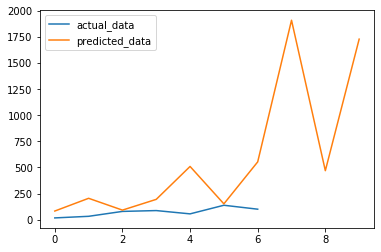

In [34]:
plt.plot(timeseries_data,label='actual_data')
plt.plot(lst_output, label='predicted_data')
plt.legend()
